In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON files
file1_path ='flexible_cot_transfer_result_prob_mean.json' #'flexible_cot_transfer_result_direct_vote.json'
file2_path = 'outputs_openai/All_results.json'

with open(file1_path, 'r') as file1:
    data1 = json.load(file1)

with open(file2_path, 'r') as file2:
    data2 = json.load(file2)

# Convert data to DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# df1=df1[(df1['logit_w'] > 0) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == 1)) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == -1))]
# Compute means grouped by Benchmark
#  "flexible_cot_transfer": 0.9178,
#         "transfer_pred_token_use": 197.6159
df1_means = df1.groupby('Benchmark')[['transfer_pred_token_use']].mean().reset_index()
df2_means = df2.groupby('Benchmark')[['CoT_mean_tokens']].mean().reset_index()

# Merge means on Benchmark
merged_means = pd.merge(df1_means, df2_means, on='Benchmark', how='inner')


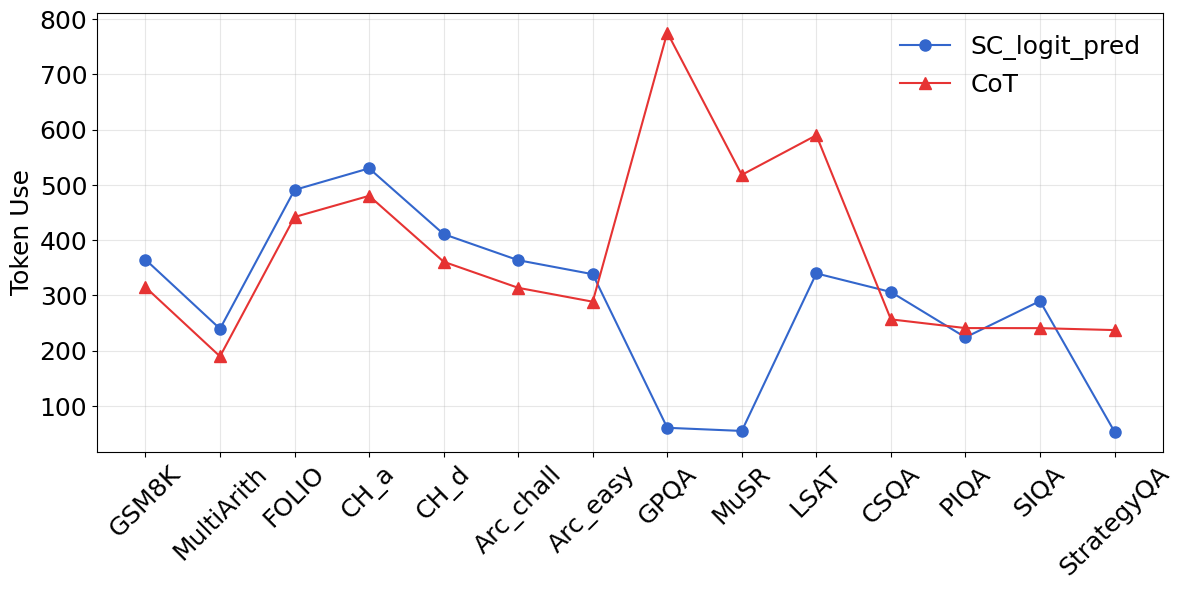

In [13]:
# Define the specified order of Benchmarks
benchmark_order = [
    "gsm8k", "MultiArith",  "FOLIO", "ContextHub_abductive", 
    "ContextHub_deductive", "arc_challenge", "arc_easy","gpqa", "MuSR", 
    "lsat", "commensenseqa", "piqa", "siqa", "strategyqa"
]
custom_xticks = [
    "GSM8K", "MultiArith", "FOLIO", "CH_a", "CH_d", 
    "Arc_chall", "Arc_easy","GPQA",  "MuSR", "LSAT", 
    "CSQA", "PIQA", "SIQA", "StrategyQA"
]
# Reorder the merged DataFrame according to the benchmark order
merged_means['Benchmark'] = pd.Categorical(merged_means['Benchmark'], categories=benchmark_order, ordered=True)
merged_means = merged_means.sort_values('Benchmark')

color1 = (0.9, 0.2, 0.2)  # 柔和的红色
color2 = (0.2, 0.4, 0.8)  # 柔和的蓝色
color3 = (0.1, 0.5, 0.2)
# Plot the results with the specified order
plt.figure(figsize=(12, 6))
benchmarks = merged_means['Benchmark']
x = range(len(benchmarks))

plt.plot(x, merged_means['transfer_pred_token_use']+50, marker='o', label='SC_logit_pred',color=color2, markersize=8)
# plt.plot(x, merged_means['enumerate_pred_token_use'], marker='s', label='enumerate_pred_token_use')
plt.plot(x, merged_means['CoT_mean_tokens'], marker='^', label='CoT',color=color1, markersize=8)

plt.xticks(x, custom_xticks, rotation=45, fontsize=18)
# plt.xlabel('Benchmark')
plt.yticks(fontsize=18)
plt.ylabel('Token Use', fontsize=18)
# plt.title('Mean Comparison by Benchmark')
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('token_use_figure.pdf', format='pdf')
plt.show()


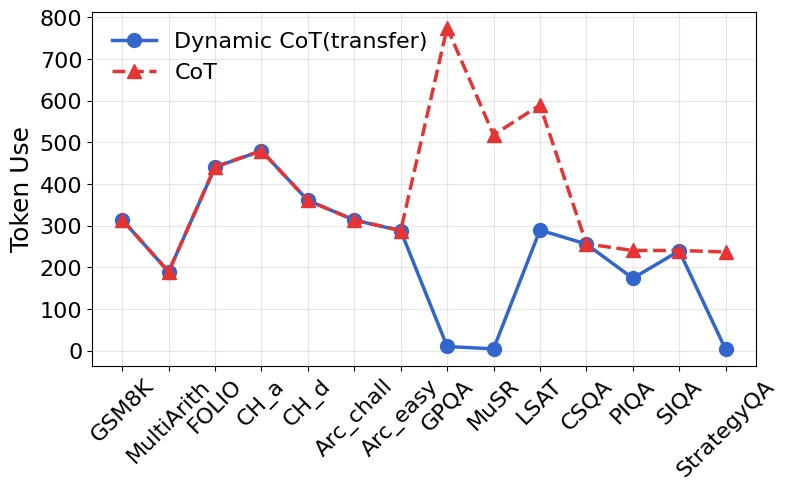

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set ICML-friendly style
# mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.grid'] = True  # Light grid for readability
mpl.rcParams['grid.alpha'] = 0.3  # Slightly transparent grid
mpl.rcParams['legend.frameon'] = False  # No box around legend

plt.figure(figsize=(8, 5))  # Optimal size for ICML two-column format

# Plot lines with improved markers and line styles
plt.plot(x, merged_means['transfer_pred_token_use'], 
         marker='o', markersize=10, linestyle='-', linewidth=2.5, 
         label='Dynamic CoT(transfer)', color=color2)

plt.plot(x, merged_means['CoT_mean_tokens'], 
         marker='^', markersize=10, linestyle='--', linewidth=2.5, 
         label='CoT', color=color1)

# Customize ticks
plt.xticks(x, custom_xticks, rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Labels
plt.ylabel('Token Use', fontsize=18)
# plt.xlabel('Your X-axis Label', fontsize=18)  # Add xlabel if needed

# Adjust legend
plt.legend(fontsize=16, loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Save with proper DPI for print quality
plt.savefig('token_use_figure_transfer.pdf', format='pdf', dpi=300)

plt.show()


In [15]:
mean_diff = merged_means['transfer_pred_token_use'].mean() - merged_means['CoT_mean_tokens'].mean()
print("token use decrease:", mean_diff)


token use decrease: -134.46498214285717


In [16]:
merged_means['CoT_mean_tokens'].mean()

374.85357142857146

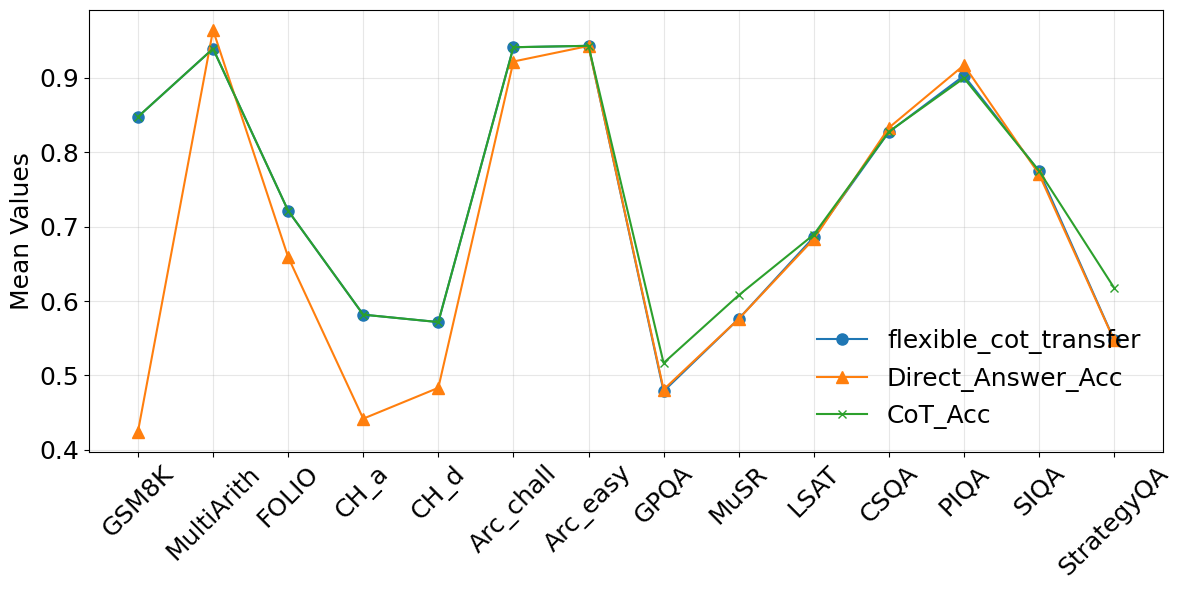

In [17]:
# Recalculate and process for new metrics
# Calculate means grouped by Benchmark for the new metrics
df1_means_new = df1.groupby('Benchmark')[['flexible_cot_transfer']].mean().reset_index()
df2_means_new = df2.groupby('Benchmark')[['Direct_Answer_Acc', 'CoT_Acc']].mean().reset_index()

# Merge the new means on Benchmark
merged_means_new = pd.merge(df1_means_new, df2_means_new, on='Benchmark', how='inner')

# Reorder the merged DataFrame according to the specified benchmark order
merged_means_new['Benchmark'] = pd.Categorical(merged_means_new['Benchmark'], categories=benchmark_order, ordered=True)
merged_means_new = merged_means_new.sort_values('Benchmark')

# Plot the results
plt.figure(figsize=(12, 6))
benchmarks_new = merged_means_new['Benchmark']
x_new = range(len(benchmarks_new))

plt.plot(x_new, merged_means_new['flexible_cot_transfer'], marker='o', label='flexible_cot_transfer', markersize=8)
# plt.plot(x_new, merged_means_new['flexible_cot_enumerate'], marker='s', label='flexible_cot_enumerate')
plt.plot(x_new, merged_means_new['Direct_Answer_Acc'], marker='^', label='Direct_Answer_Acc', markersize=8)
plt.plot(x_new, merged_means_new['CoT_Acc'], marker='x', label='CoT_Acc')

plt.xticks(x, custom_xticks, rotation=45, fontsize=18)
# plt.xlabel('Benchmark')
plt.yticks(fontsize=18)
plt.ylabel('Mean Values', fontsize=18)
# plt.title('Mean Comparison by Benchmark for Flexible CoT and Accuracy Metrics')
plt.legend(fontsize=18, loc='lower right')
plt.tight_layout()
plt.savefig('flexible_acc_figure.pdf', format='pdf')
plt.show()


In [18]:
x_new

range(0, 14)

In [19]:
merged_means_new['flexible_cot_transfer']

9     0.84760
4     0.93915
2     0.72135
0     0.58170
1     0.57170
5     0.94110
6     0.94300
8     0.47880
3     0.57605
10    0.68585
7     0.82720
11    0.90285
12    0.77460
13    0.54760
Name: flexible_cot_transfer, dtype: float64

In [20]:
merged_means_new['Direct_Answer_Acc']

9     0.42455
4     0.96415
2     0.65905
0     0.44190
1     0.48335
5     0.92190
6     0.94280
8     0.48105
3     0.57605
10    0.68335
7     0.83290
11    0.91700
12    0.77050
13    0.54715
Name: Direct_Answer_Acc, dtype: float64

In [21]:
merged_means_new['CoT_Acc']

9     0.84760
4     0.93915
2     0.72135
0     0.58170
1     0.57170
5     0.94110
6     0.94300
8     0.51675
3     0.60780
10    0.68930
7     0.82760
11    0.89965
12    0.77485
13    0.61770
Name: CoT_Acc, dtype: float64

In [22]:
import json
import pandas as pd

# Load the data from the two files
file1_path = 'flexible_cot_result_50.json'
file2_path = 'All_results.json'

with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2:
    data1 = json.load(file1)
    data2 = json.load(file2)

# Convert the JSON data to pandas DataFrames for easier processing
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1=df1[(df1['logit_w'] > 0) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == 1)) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == -1))]
# Merge the two DataFrames on 'Benchmark' and 'Model'
merged_df = pd.merge(df1, df2, on=['Benchmark', 'Model'])

# Calculate max_acc as the maximum of 'Direct_Answer_Acc' and 'CoT_Acc'
merged_df['max_acc'] = merged_df[['Direct_Answer_Acc', 'CoT_Acc']].max(axis=1)
# merged_df['max_acc'] = merged_df[['Direct_Answer_Acc', 'CoT_Acc']].max(axis=1)

# Calculate differences
merged_df['logit_diff'] = merged_df['flexible_cot_transfer'] - merged_df['max_acc']
merged_df['enumerate_diff'] = merged_df['flexible_cot_enumerate'] - merged_df['max_acc']

# Calculate the means of the differences
logit_diff_mean = merged_df['logit_diff'].mean()
enumerate_diff_mean = merged_df['enumerate_diff'].mean()

# Output the results
logit_diff_mean, enumerate_diff_mean


FileNotFoundError: [Errno 2] No such file or directory: 'flexible_cot_result_50.json'

In [168]:
merged_df['logit_diff']

0    -0.0086
1    -0.0086
2    -0.0330
3    -0.0065
4    -0.0085
5     0.0062
6    -0.0008
7    -0.0079
8     0.0004
9    -0.0097
10    0.0026
11    0.0007
12   -0.0070
13    0.0010
14   -0.0411
15    0.0005
16   -0.0063
17    0.0013
18    0.0073
19    0.0059
20    0.0040
21   -0.0083
22    0.0076
23    0.0044
24   -0.0175
25   -0.0167
26   -0.0370
27   -0.0031
28   -0.0271
29   -0.0317
30    0.0056
31    0.0050
32    0.0056
33    0.0041
34    0.0009
35   -0.0249
36   -0.0016
37   -0.0064
38   -0.0068
39    0.0069
40    0.0052
41    0.0096
42    0.0018
43   -0.0082
44    0.0067
45   -0.0066
46    0.0028
Name: logit_diff, dtype: float64

In [169]:
file1_path = 'flexible_cot_result_50_C0_1.json'

with open(file1_path, 'r') as file1:
    data1 = json.load(file1)

# Convert the JSON data to a pandas DataFrame for easier processing
import pandas as pd

df1 = pd.DataFrame(data1)

# Filter the DataFrame based on the conditions
filtered_df = df1[(df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] != 1) & (df1['logit_threshold_clipped'] != -1)]

# Count the number of elements that meet the criteria
filtered_count = len(filtered_df)
filtered_count
filtered_results = filtered_df[['Model', 'Benchmark']]
print(filtered_results,filtered_count)

                       Model             Benchmark
4      Llama-3.2-3B-Instruct  ContextHub_abductive
36  Mistral-7B-Instruct-v0.3                  MuSR
37  Mistral-7B-Instruct-v0.3                  lsat
51     Llama-3.1-8B-Instruct                  lsat 4


In [170]:
filtered_df = df1[(df1['logit_w'] < 0)]

# Count the number of elements that meet the criteria
filtered_count = len(filtered_df)
filtered_count

4

In [171]:
filtered_df = df1[ (df1['logit_threshold_clipped'] == 1) | (df1['logit_threshold_clipped'] == -1)]

# Count the number of elements that meet the criteria
filtered_count = len(filtered_df)
filtered_count

42

In [172]:
filtered_df = df1[ ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == 1)) | ((df1['logit_w'] > 0) & (df1['logit_threshold_clipped'] == -1))]

# all_cot_num
filtered_count = len(filtered_df)
filtered_count


1